<a href="https://colab.research.google.com/github/ad5454/Thermo_Project/blob/main/Thermo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-11-02 15:58:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-02 15:58:19 (62.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
project_01 = pd.read_csv("https://raw.githubusercontent.com/ad5454/Thermo_Project/main/regression_csv_01.csv")

In [4]:
project_01.head()

,latitude,altitude,precipitation,humidity,windspeed,temperature
0,34.1526,3500.0,102.0,70.0,1.4,5.0
1,34.5539,2676.0,327.0,76.0,5.0,7.5
2,34.3201,2987.0,76.2,54.0,11.3,3.0
3,32.9681,4595.0,76.2,70.0,8.8,-0.5
4,34.0837,1585.0,720.0,73.0,4.8,10.8


In [5]:
x=project_01.drop("temperature",axis=1)
y=project_01["temperature"]

In [6]:
x.head()

,latitude,altitude,precipitation,humidity,windspeed
0,34.1526,3500.0,102.0,70.0,1.4
1,34.5539,2676.0,327.0,76.0,5.0
2,34.3201,2987.0,76.2,54.0,11.3
3,32.9681,4595.0,76.2,70.0,8.8
4,34.0837,1585.0,720.0,73.0,4.8


In [7]:
# Creating training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [8]:
len(x_train),len(x_test)

(92, 24)

Model_01

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_01=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_01.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['mae'])
# Fit the model
history=model_01.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 910.6606 - mae: 910.6606
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 217806.1250 - mae: 217806.1250
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 119963024.0000 - mae: 119963024.0000
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 148898709504.0000 - mae: 148898709504.0000
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 244672995786752.0000 - mae: 244672995786752.0000
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 152942118963249152.0000 - mae: 152942118963249152.0000
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 98467520289479589888.0000 - mae: 98467520289479589888.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 186132997980086691954688.0000 - mae: 186132997980086691954688.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - l

Model_02

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_02=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_02.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae'])
# Fit the model
history=model_02.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 8ms/step - loss: 35.2620 - mae: 35.2620
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 17.1670 - mae: 17.1670
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 12.3994 - mae: 12.3994
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 8.8766 - mae: 8.8766
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 10.4496 - mae: 10.4496
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 8.4707 - mae: 8.4707
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 10.9942 - mae: 10.9942
Epoch 8/200
3/3 [==============================] - 0s 7ms/step - loss: 7.7656 - mae: 7.7656
Epoch 9/200
3/3 [==============================] - 0s 13ms/step - loss: 11.3901 - mae: 11.3901
Epoch 10/200
3/3 [==============================] - 0s 11ms/step - loss: 11.0569 - mae: 11.0569
Epoch 11/200
3/3 [==============================] - 0s 9ms/ste

In [11]:
model_02.evaluate(x_test,y_test)

1/1 [==============================] - 0s 313ms/step - loss: 16.0060 - mae: 16.0060


[16.006006240844727, 16.006006240844727]

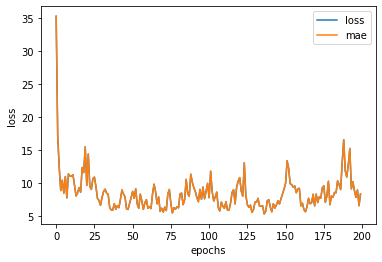

In [12]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Model_03

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_03=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_03.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_03.fit(x_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_03.evaluate(x_test,y_test)

In [ ]:
model_03.summary()

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Preprocessing data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["latitude","altitude","precipitation" ,"humidity","windspeed"])
)

# Create x & y
x=project_01.drop("temperature",axis=1)
y=project_01["temperature"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer o training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal[0]

Model_04

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_04=tf.keras.Sequential([
    # tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_04.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_04.fit(x_train_normal,y_train,epochs=500,verbose=0)

In [ ]:
model_04.evaluate(x_test_normal,y_test)

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Model_05

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_05=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(10000),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_05.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_05.fit(x_train_normal,y_train,epochs=500,verbose=0)

# Evaluation
model_05.evaluate(x_test_normal,y_test)

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_05.evaluate(x_test_normal,y_test)